In [18]:
# Problem Statement 1: Natural Language Processing (NLP)


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Example usage
text = input()
print(*preprocess_text(text))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


i love to ride a bike
love ride bike


In [40]:
# Problem Statement 5: Live Coding Session - API Integration


import pandas as pd
import requests

def fetch_github_user(username):
    api_url = f"https://api.github.com/users/{username}"
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Raise error for bad responses
        data = response.json()  # Parse JSON data
        return data
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")

# Example usage
username = "thirumal4198"
data = fetch_github_user(username)
display(pd.DataFrame([data]))




,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,thirumal4198,165140574,U_kgDOCdfYXg,https://avatars.githubusercontent.com/u/165140...,,https://api.github.com/users/thirumal4198,https://github.com/thirumal4198,https://api.github.com/users/thirumal4198/foll...,https://api.github.com/users/thirumal4198/foll...,https://api.github.com/users/thirumal4198/gist...,...,None,None,None,None,10,0,0,1,2024-03-27T08:14:45Z,2024-08-11T09:04:31Z


In [41]:
# Problem Statement 2: Text Generation


from transformers import pipeline

# Load the text generation pipeline
generator = pipeline('text-generation', model='gpt2')

# Prompt for text generation
prompt = input()

# Generate text
generated_text = generator(prompt, max_length=100, num_return_sequences=1,truncation=True)

# Print the generated text
print('----------------', generated_text[0]['generated_text'],'-------------')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


i love to watch


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


---------------- i love to watch the show, especially when it's directed by Bryan Fuller and directed by Alex Bogdanovic. We wanted an actor who could drive the show and give the viewer a realistic portrayal of life in the U.S. That could be the best role of 2017 because it's very simple to watch The Bachelor, especially when you understand that the show is about life in America and what it means to be a citizen of the U.S. We looked at the top 100 best shows of -------------


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_number,month_sin,month_cos,elapsed_time
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990,1,0.5,0.866025,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990,1,0.5,0.866025,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990,1,0.5,0.866025,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990,1,0.5,0.866025,0
4,1990-01-01,ANG MO KIO,3 ROOM,110,ANG MO KIO AVE 4,10 TO 12,67.0,NEW GENERATION,1978,34000.0,0,1990,1,0.5,0.866025,0


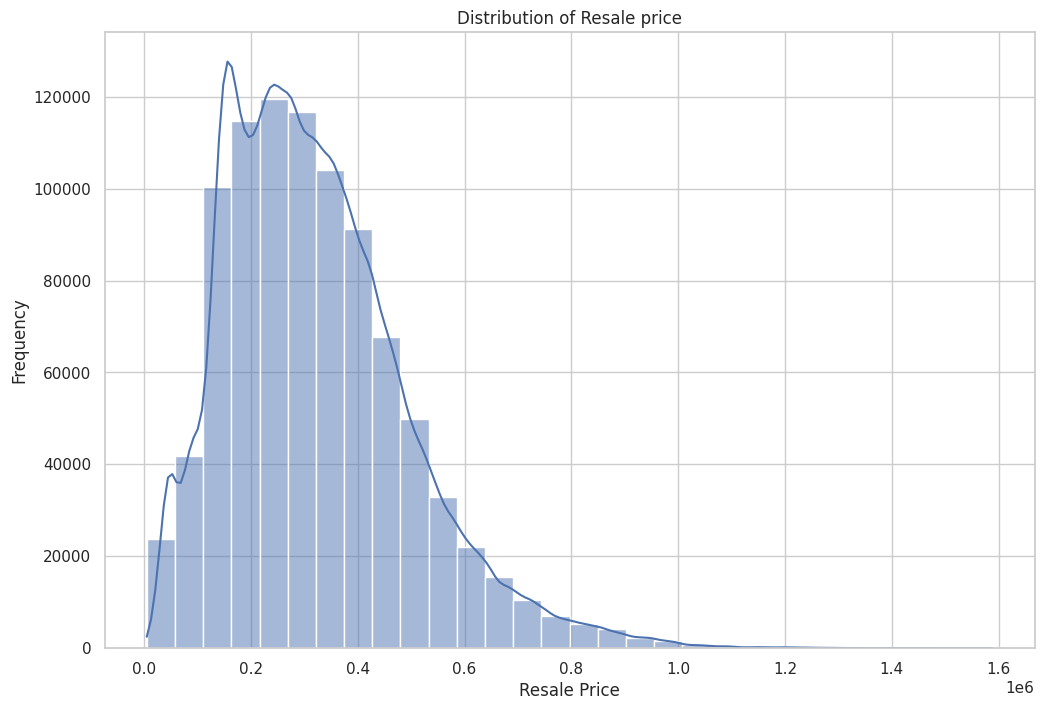

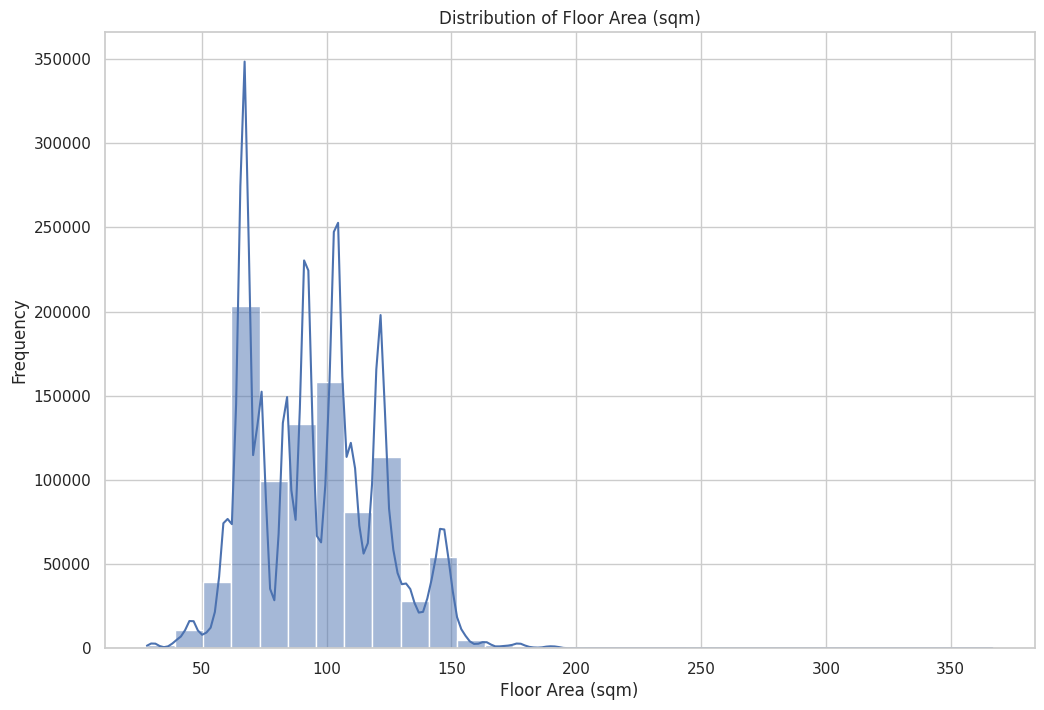

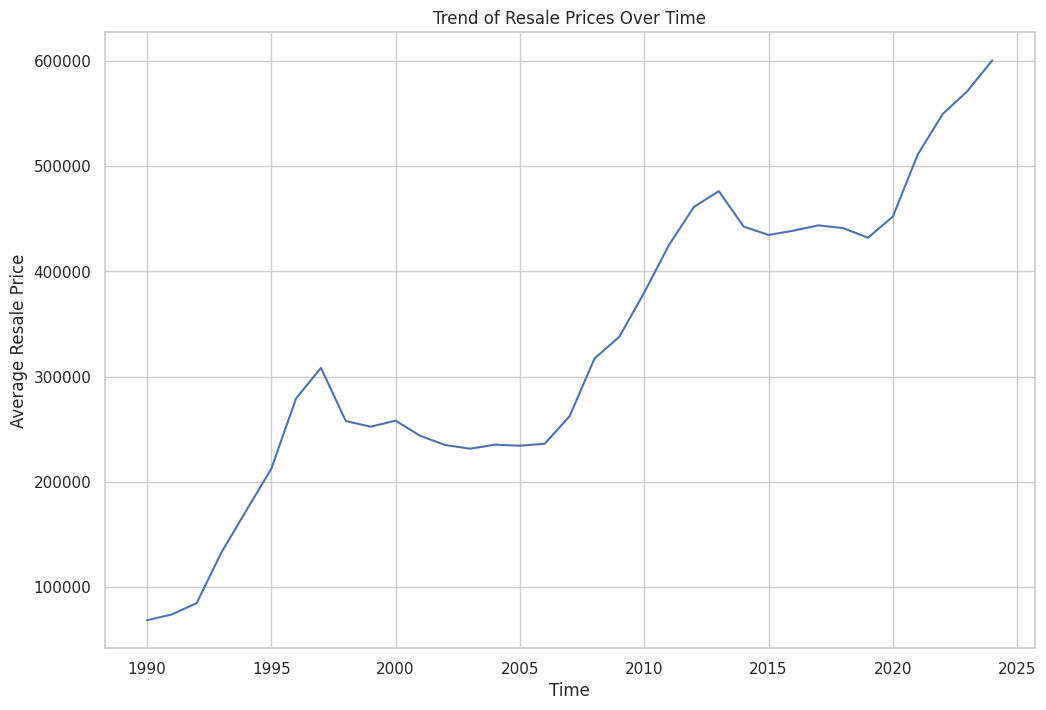

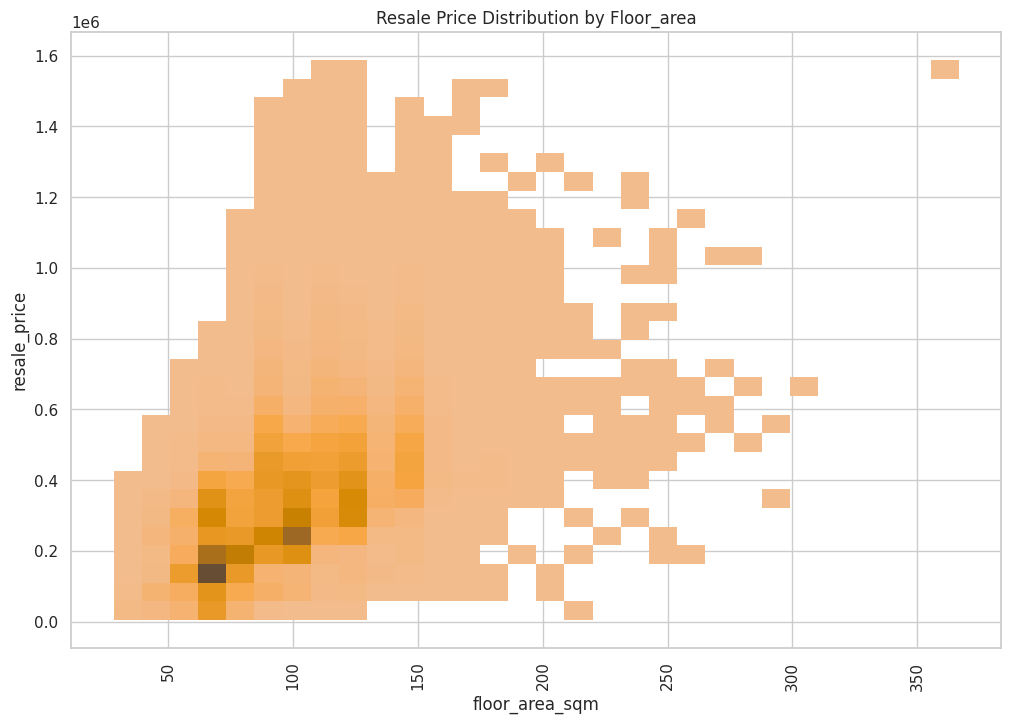

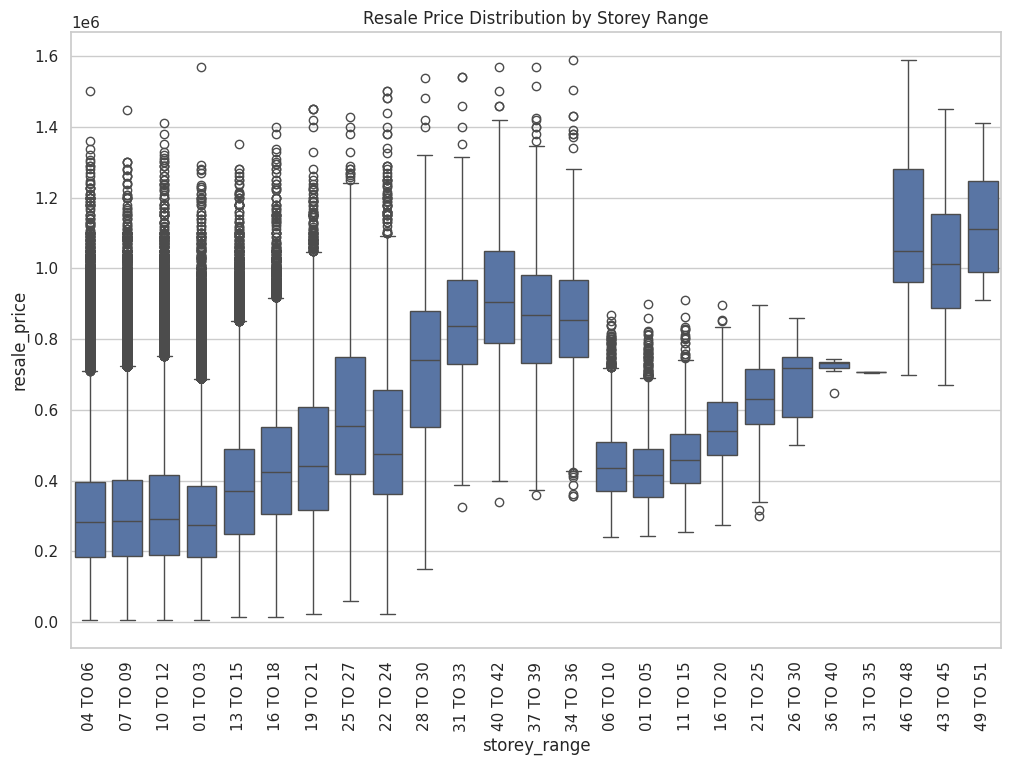

In [37]:
# Problem Statement 4: Data Analysis


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

with open('/content/cleaned_data.pkl','rb') as f:
  df = pickle.load(f)

display(df.head())

sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.histplot(df['resale_price'], kde = True, bins =30)
plt.title('Distribution of Resale price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(df['floor_area_sqm'], kde=True, bins=30)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 8))
df.groupby('year')['resale_price'].mean().plot()
plt.title('Trend of Resale Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Average Resale Price')
plt.grid(True)
plt.show()


#resale price by floor area
plt.figure(figsize=(12, 8))
sns.histplot(x='floor_area_sqm', y='resale_price', data=df, bins=30, color='orange')
plt.xticks(rotation=90)
plt.title('Resale Price Distribution by Floor_area')
plt.show()

# Boxplot of resale_price by storey_range
plt.figure(figsize=(12, 8))
sns.boxplot(x='storey_range', y='resale_price', data=df)
plt.xticks(rotation=90)
plt.title('Resale Price Distribution by Storey Range')
plt.show()


In [33]:
!ls -lh cleaned_data.pkl

-rw-r--r-- 1 root root 0 Sep  5 05:20 cleaned_data.pkl


In [29]:
!pip install rouge

In [42]:
# problem statement 3

# Example prompt for summarization
prompt = "Please provide a concise summary of the following text: [Insert text here]"

# Example prompt for question answering
prompt = "Answer the following question based on the given context: [Question] \n Context: [Context]"

# Example code for evaluating summarization
from rouge import Rouge

rouge = Rouge()
hypothesis = "This is a summary."
reference = "This is a good summary."
scores = rouge.get_scores(hypothesis, reference)
print(scores)

# Example code for evaluating question answering
def evaluate_qa(predictions, ground_truths):
    correct = 0
    total = len(predictions)
    for pred, gt in zip(predictions, ground_truths):
        if pred == gt:
            correct += 1
    accuracy = correct / total
    return accuracy

# Example usage
predictions = ["Answer 1", "Answer 2"]
ground_truths = ["Answer 1", "Answer 3"]
accuracy = evaluate_qa(predictions, ground_truths)
print(accuracy)

[{'rouge-1': {'r': 0.8, 'p': 1.0, 'f': 0.8888888839506174}, 'rouge-2': {'r': 0.5, 'p': 0.6666666666666666, 'f': 0.5714285665306124}, 'rouge-l': {'r': 0.8, 'p': 1.0, 'f': 0.8888888839506174}}]
0.5
